# 准备

In [2]:
import time
import pandas as pd
import numpy as np
import calendar
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%pylab inline

df_song_by_artist = pd.read_csv('./data/songs_by_artist.csv', 
                             header = None, 
                             names = ['date', 'play', 'download', 'like', 'artist_id'])

df_user_actions = pd.read_csv('./data/mars_tianchi_user_actions.csv', 
                              header = None, 
                              names = ('user_id', 'song_id', 'gmt_create', 'action_type', 'Ds'))

df_song_info = pd.read_csv('./data/mars_tianchi_songs.csv', 
                           header = None, 
                           names = ('song_id', 'artist_id', 'public_time',
                                    'popular', 'language', 'gender'))

artist_id = list(set(df_song_by_artist['artist_id']))
artists = {}
for i in range(0, df_song_info.shape[0]):
    artist = df_song_info.iloc[i]['artist_id']
    song = df_song_info.iloc[i]['song_id']
    if artist not in artists:
        artists[artist] = []
    artists[artist].append(song)

Populating the interactive namespace from numpy and matplotlib


# 方案1
** 读取按照歌手统计的每日歌曲播放量数据，计算平均值，生成输出表格**

In [7]:
dates = pd.date_range('20150901', '20151030')

for artist in artist_id[:]:
    data = df_song_by_artist[df_song_by_artist['artist_id'] == artist][-15:]
    data_mean = data.mean(axis = 0)
    data_mean_play = data_mean[0]
    temp = pd.DataFrame(data={'artist_id':artist, 'play':int(data_mean_play)}, index=dates)
    temp['date']=dates
    temp.to_csv('./output/mean_by_artist_last15days_august.csv', mode = 'a', encoding='utf-8',
                date_format = "%Y%m%d", index = False,header = False)

# 方案2

**星期统计**

- 按照歌手，分析每星期的播放数据

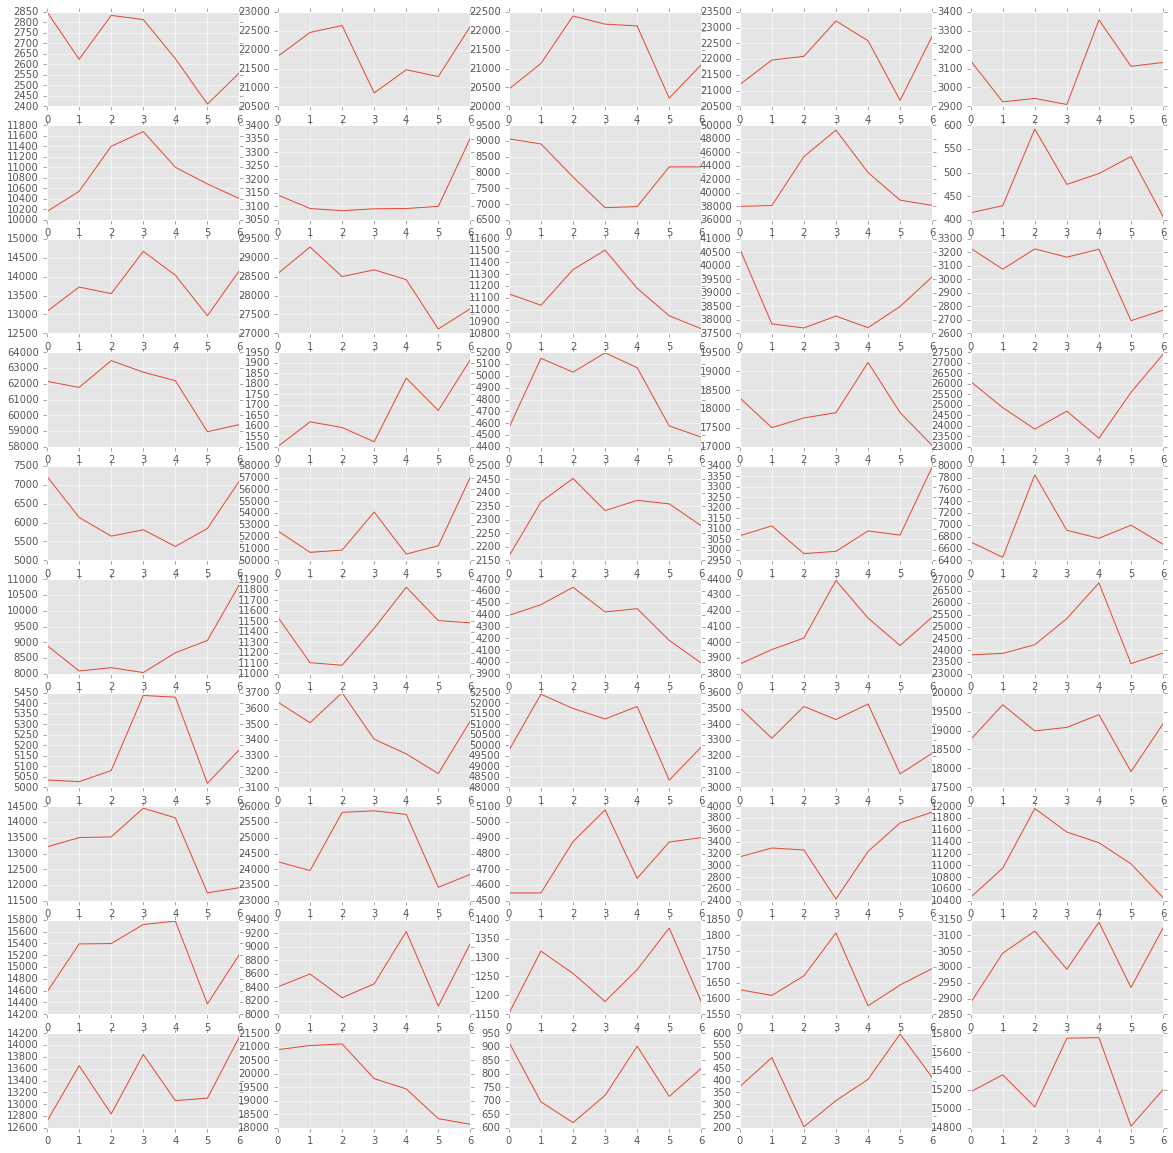

In [76]:
import datetime
def get_wday(time_value):
    
    return datetime.datetime.strptime(time_value,'%Y-%m-%d').weekday()+1

df_song_by_artist['w_day'] = df_song_by_artist['date'].apply(get_wday)

data_w_day = {}
for artist in artist_id[:]:
    data_w_day[artist] = [0,0,0,0,0,0,0]
    temp = df_song_by_artist[df_song_by_artist.artist_id == artist]
    play = list(temp['play'])
    w_day = list(temp['w_day'])
    i = 0
    for item in w_day:
        data_w_day[artist][item-1] += int(play[i])
        i += 1

fig = plt.figure(figsize = (20, 20))
i = 1
for artist in data_w_day:
    ax = fig.add_subplot(10, 5, i)
    play = data_w_day[artist]
    df = pd.Series(data = play)
    df.plot(ax = ax)
    i+=1

- 统计所有歌手，每星期的播放数据

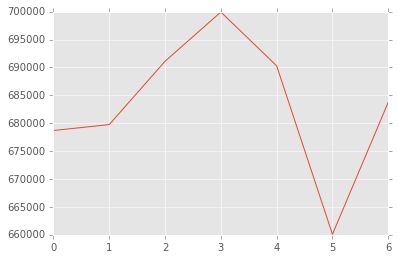

In [77]:
play_sum = [0,0,0,0,0,0,0]
for artist in data_w_day:
    play = data_w_day[artist]
    for j in range(0, 7):
        play_sum[j] += play[j]
        
pd.Series(data = play_sum).plot()

** 将一首歌曲按照天分开，统计逐小时的播放量 **

- 为user_action表添加小时数据段

使用dataframe的apply方法，对一个Series进行操作，应用自定义的函数获取小时字段

In [6]:
def get_hour(time_value):
    time_value = time.localtime(time_value)
    return time_value.tm_hour

def get_wday(time_value):
    time_value = time.localtime(time_value)
    return time_value.tm_wday+1

In [7]:
df_user_actions['hour'] = df_user_actions['gmt_create'].apply(get_hour)
df_user_actions['week_day'] = df_user_actions['gmt_create'].apply(get_wday)

In [19]:
df_user_actions

,user_id,song_id,gmt_create,action_type,Ds,hour,week_day
0,7063b3d0c075a4d276c5f06f4327cf4a,effb071415be51f11e845884e67c0f8c,1426406400,1,20150315,16,7
1,0db66c0dd3993fd3504bb98c3beb15b3,f87ff481d85d2f95335ab602f38a7655,1426417200,1,20150315,19,7
2,f8c065dc140ec74c6e44144164e618e3,8a27d9a6c59628c991c154e8d93f412e,1426406400,2,20150315,16,7
3,2c6082cf0d68e244f2a10325e8d1b85b,ecea5fe33e6817d09c395f2910479728,1426417200,1,20150315,19,7
4,2c6082cf0d68e244f2a10325e8d1b85b,31a3d0420d89c9b121bb55dbdbbeda6b,1426417200,1,20150315,19,7
5,2c6082cf0d68e244f2a10325e8d1b85b,096e604f7b152fad0246ae731ed8ca73,1426417200,1,20150315,19,7
6,da87f512eaa2465a6f3bc3c1392a3ff3,5a7d9d75b898cd1b19ef6941cc1ddccf,1426348800,1,20150315,0,7
7,51cecc193b9b7d0478904cd99999fcb4,8a103bd3a3295fbf9b3c3bf7972db299,1426381200,2,20150315,9,7
8,5c150198fbf8fd3a872ba56ee0e82757,17e90c7b3b7ebbe4b47344fcfab2fa7a,1426359600,1,20150315,3,7
9,bafdea952000d147ac13837c408f3540,8a27d9a6c59628c991c154e8d93f412e,1426348800,2,20150315,0,7


In [78]:
# data_w_day = {}
# for artist in artist_id[:2]:
#     songs = artists[artist]
# #     temp = df_user_actions[df_user_actions['artist_id'] == artist]
#     data_w_day[artist] = {}
#     for w_day in range(1, 8):
#         count = 0
#         for s in songs:
#             count += len(df_user_actions[(df_user_actions['week_day'] == w_day) 
#                                                              & (df_user_actions['song_id'] == s) 
#                                                              & (df_user_actions['action_type'] == 1)])
#         data_w_day[artist][str(w_day)] = count
# print data_w_day

- 对单首歌曲进行分析

选择歌曲“ecea5fe33e6817d09c395f2910479728”

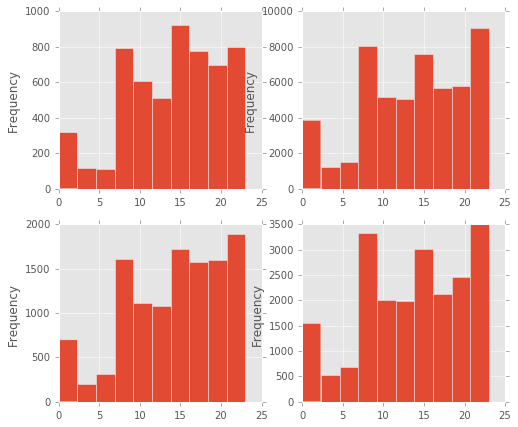

In [49]:
fig = plt.figure(figsize=(8, 7))

ax1 = fig.add_subplot(2, 2, 1)

df_user_actions[(df_user_actions.song_id == "ecea5fe33e6817d09c395f2910479728")
                                 & (df_user_actions.action_type == 1)]['hour'].plot.hist()

ax2 = fig.add_subplot(2, 2, 2)

df_user_actions[(df_user_actions.song_id == "8a27d9a6c59628c991c154e8d93f412e")
                                 & (df_user_actions.action_type == 1)]['hour'].plot.hist()

ax3 = fig.add_subplot(2, 2, 3)

df_user_actions[(df_user_actions.song_id == "31a3d0420d89c9b121bb55dbdbbeda6b")
                                 & (df_user_actions.action_type == 1)]['hour'].plot.hist()

ax4 = fig.add_subplot(2, 2, 4)

df_user_actions[(df_user_actions.song_id == "f87ff481d85d2f95335ab602f38a7655")
                                 & (df_user_actions.action_type == 1)]['hour'].plot.hist()